In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import utils #to clean data
from sklearn import linear_model
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'gender_submission.csv']


In [15]:
train_data= pd.read_csv('../input/train.csv')
test_data= pd.read_csv('../input/test.csv')
# Add column with header "DataSet" and set to "Training" for 
# training data and "Testing" for testing data
train_data['DataSet'] = 'Training'
test_data['DataSet'] = 'Testing'

# Append testing data to training dataset
all_data=train_data.append(test_data)
all_data=all_data.reset_index()

train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'DataSet'],
      dtype='object')

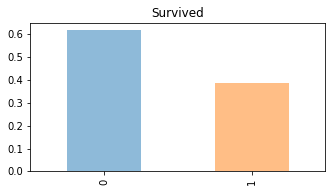

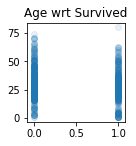

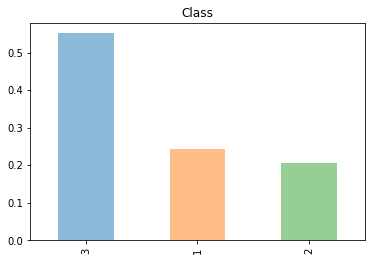

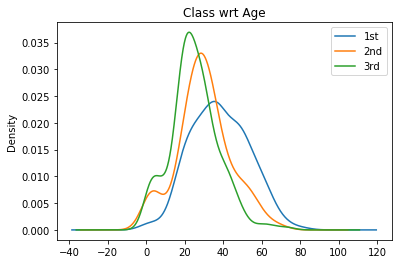

In [16]:
fig =plt.figure(figsize=(18,6))
plt.subplot2grid((2,3),(0,0))
train_data.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Survived")
plt.show()
plt.subplot2grid((2,3),(0,1))
plt.scatter(train_data.Survived, df.Age, alpha = 0.1)
plt.title("Age wrt Survived")
plt.show()
plt.subplot2grid((2,3),(0,3))
train_data.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Class")
plt.show()
plt.subplot2grid((2,3),(0,4), colspan=2)
for x in [1,2,3]:
    train_data.Age[df.Pclass == x].plot(kind="kde") #kernal desity estimation
plt.title("Class wrt Age")
plt.legend(("1st","2nd","3rd"))



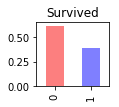

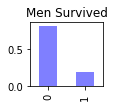

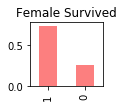

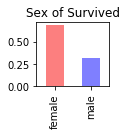

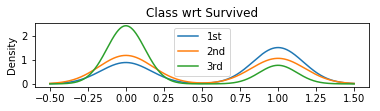

In [17]:
#Visualize Gender
female_color = "#FA0000"
plt.subplot2grid((3,4),(0,0))
train_data.Survived.value_counts(normalize=True).plot(kind="bar",color=[female_color,'B'],alpha=0.5)
plt.title("Survived")
plt.show()
plt.subplot2grid((3,4),(0,1))
train_data.Survived[df.Sex=="male"].value_counts(normalize=True).plot(kind="bar",color='B',alpha=0.5)
plt.title("Men Survived")
plt.show()
plt.subplot2grid((3,4),(0,2))
train_data.Survived[df.Sex=="female"].value_counts(normalize=True).plot(kind="bar",color = female_color,alpha=0.5)
plt.title("Female Survived")
plt.show()
plt.subplot2grid((3,4),(0,3))
train_data.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind="bar",color = [female_color,'B'],alpha=0.5)
plt.title("Sex of Survived")
plt.show()
plt.subplot2grid((3,4),(1,0), colspan=4)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde") #kernal desity estimation
plt.title("Class wrt Survived")
plt.legend(("1st","2nd","3rd"))


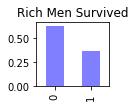

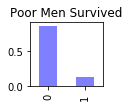

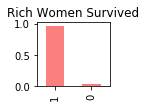

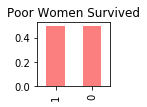

In [18]:
#Rich Men
plt.subplot2grid((3,4),(2,0))
train_data.Survived[(df.Sex == "male") & (df.Pclass==1)].value_counts(normalize=True).plot(kind="bar",color = ['B'],alpha=0.5)
plt.title("Rich Men Survived")
plt.show()
#Poor Men
plt.subplot2grid((3,4),(2,1))
train_data.Survived[(df.Sex == "male") & (df.Pclass==3)].value_counts(normalize=True).plot(kind="bar",color = ['B'],alpha=0.5)
plt.title("Poor Men Survived")
plt.show()
#Rich Women
plt.subplot2grid((3,4),(2,2))
train_data.Survived[(df.Sex == "female") & (df.Pclass==1)].value_counts(normalize=True).plot(kind="bar",color = [female_color],alpha=0.5)
plt.title("Rich Women Survived")
plt.show()
#Poor WOmen
plt.subplot2grid((3,4),(2,3))
train_data.Survived[(df.Sex == "female") & (df.Pclass==3)].value_counts(normalize=True).plot(kind="bar",color = [female_color],alpha=0.5)
plt.title("Poor Women Survived")
plt.show()

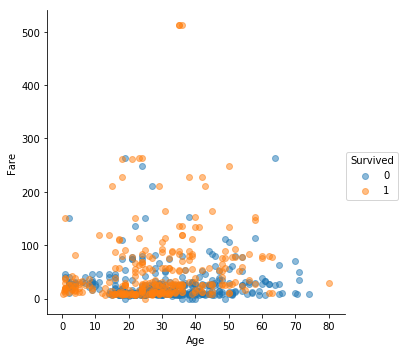

In [48]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train_data, fit_reg=False, scatter_kws={'alpha':0.5});

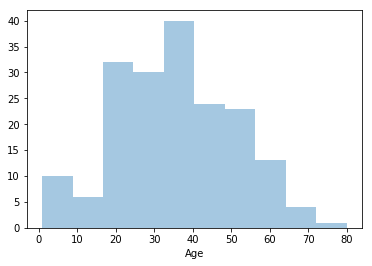

In [52]:
train_data_drop = train_data.dropna()
sns.distplot(train_data_drop.Age, kde=False);

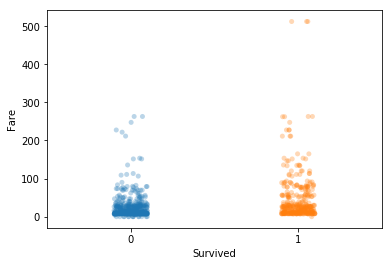

In [49]:
sns.stripplot(x='Survived', y='Fare', data=train_data, alpha=0.3, jitter=True);

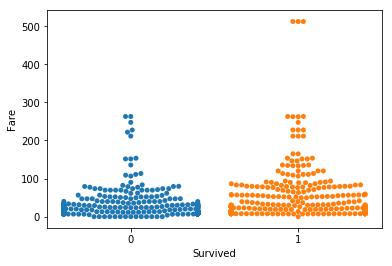

In [50]:
sns.swarmplot(x='Survived', y='Fare', data=train_data);

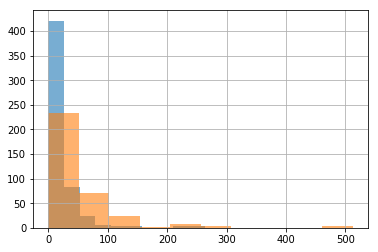

In [54]:
train_data.groupby('Survived').Fare.hist(alpha=0.6);

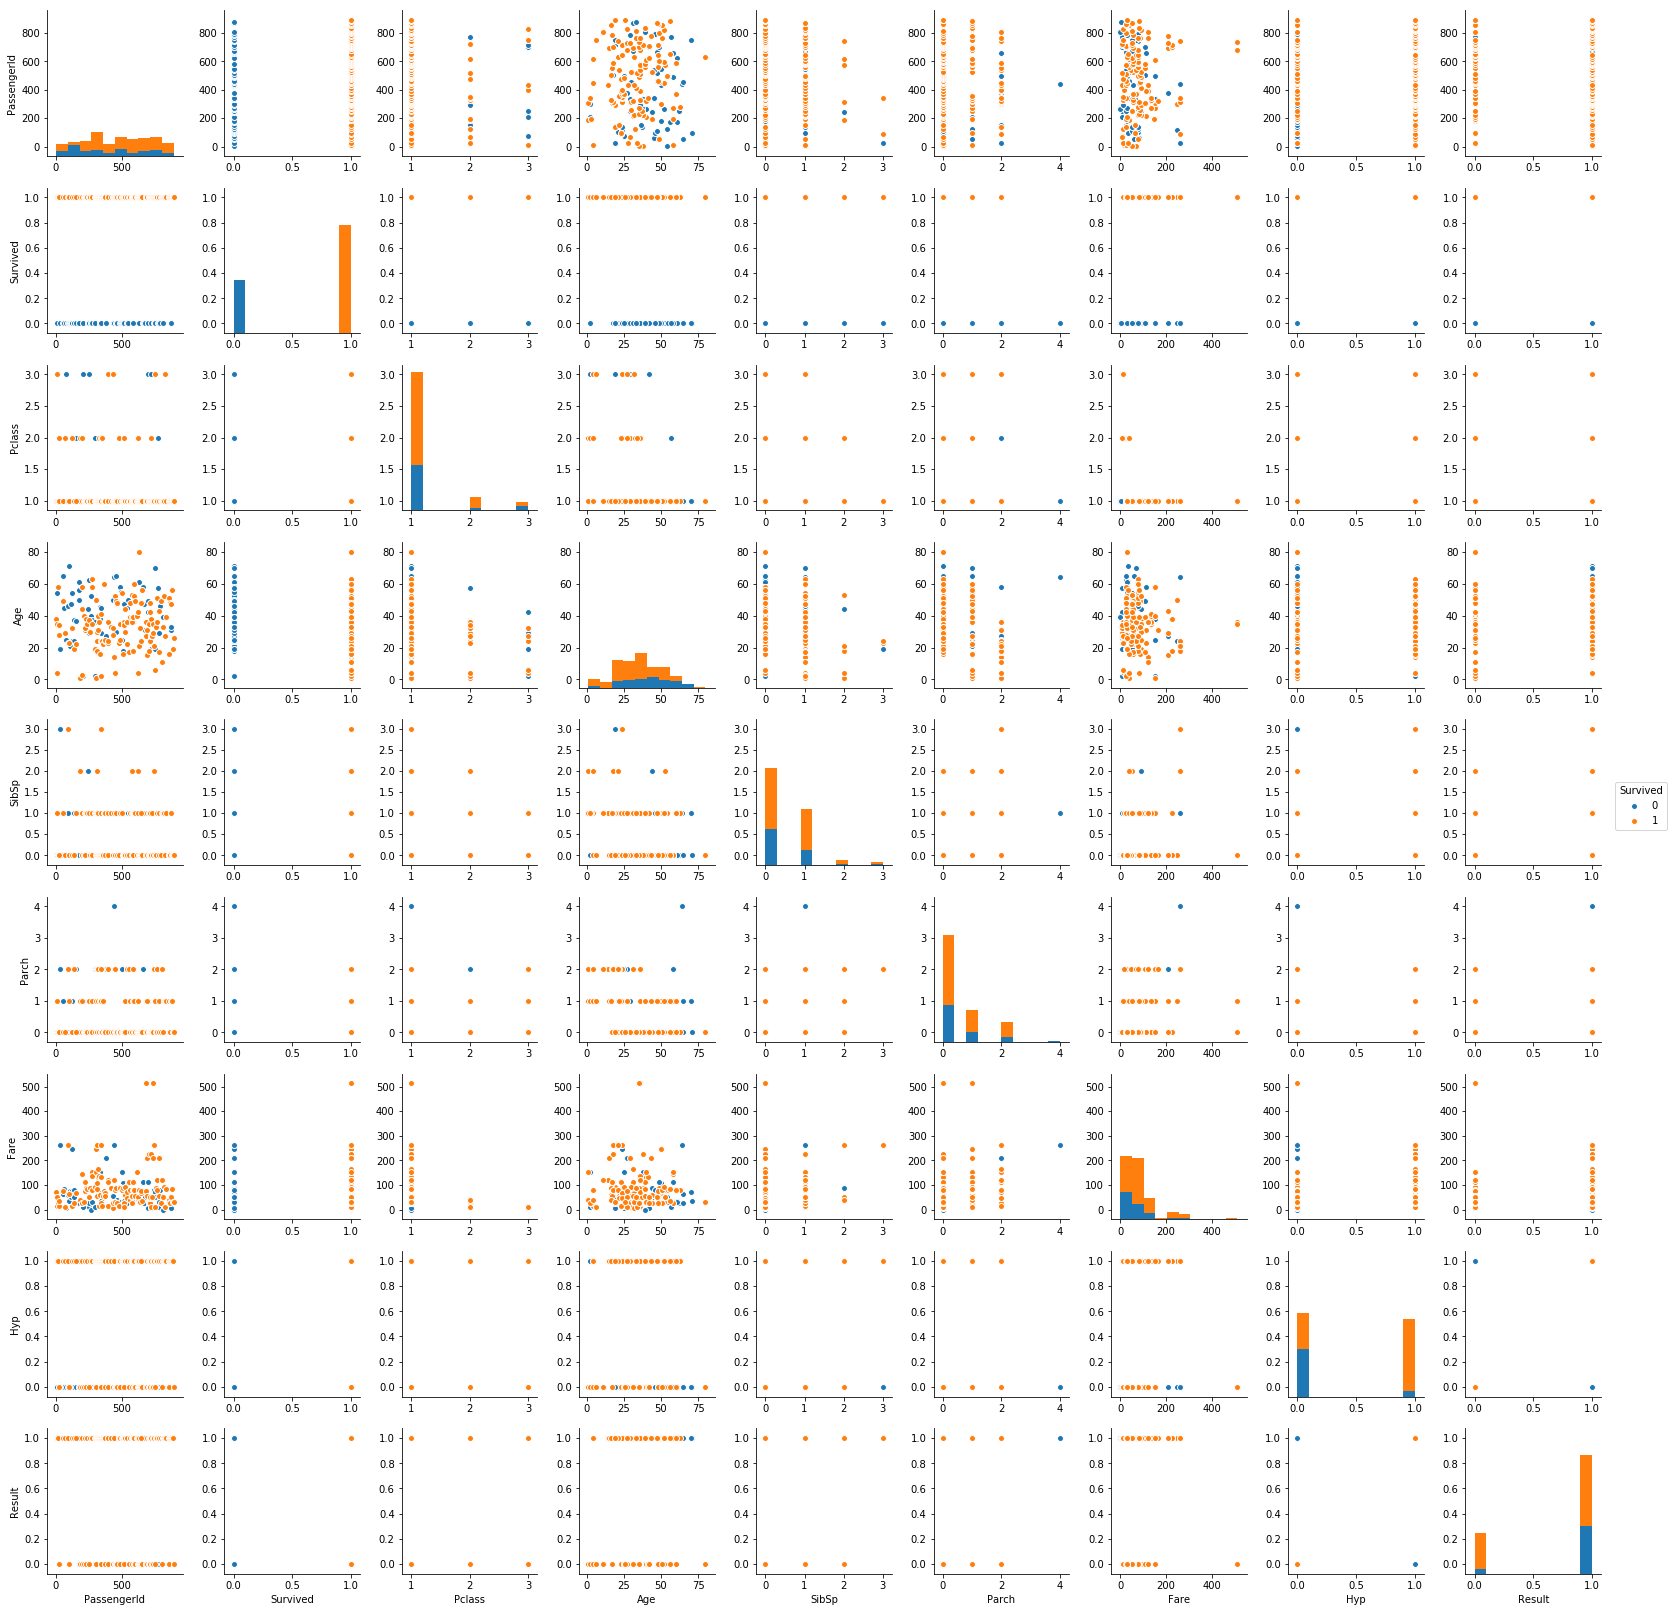

In [53]:
sns.pairplot(train_data_drop, hue='Survived');

In [19]:
def clean_data(data):
    data["Fare"]=data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"]=data["Age"].fillna(data["Age"].dropna().median())
    
    data.loc[data["Sex"]=="male","Sex"]==0
    data.loc[data["Sex"]=="female","Sex"]==0
    
    data.loc["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S","Embarked"] = 0
    data.loc[data["Embarked"] == "C","Embarked"] = 1
    data.loc[data["Embarked"] == "Q","Embarked"] = 2

In [20]:
train_data["Hyp"] = 0
train_data.loc[df.Sex == "female","Hyp"] = 1
train_data["Result"] = 0
train_data.loc[df.Survived == train_data["Hyp"],"Result"] = 1
print (train_data["Result"].value_counts(normalize="True"))


1    0.786756
0    0.213244
Name: Result, dtype: float64


# First Attempt at Visualizing the Data Using a Correlation Matrix

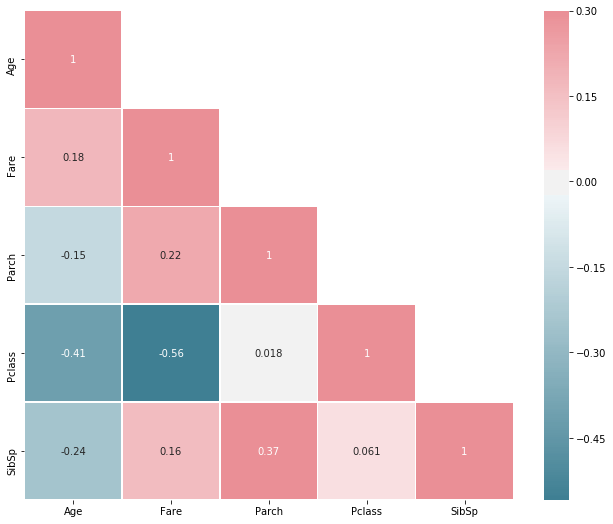

In [21]:
# Generate correlation matrix
corrMat = all_data[['Age','Cabin','Embarked','Fare','Parch','Pclass','Sex','SibSp','Ticket']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrMat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Initialize matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Set custom colormap options
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation matrix as a heatmap with mask
sns.heatmap(corrMat, mask=mask, cmap=colormap, vmax=.3, annot=True,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1})

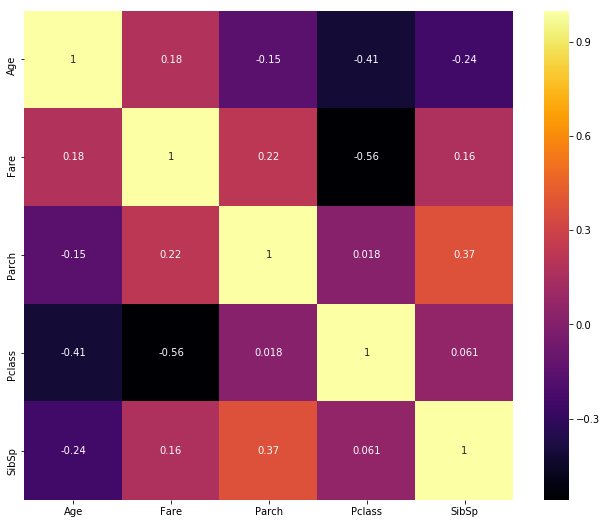

In [23]:
 #Plot alternate heatmap
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corrMat, cmap='inferno', square=True, annot=True)

# Missing Data handling

In [24]:
display(all_data[all_data['Fare'].isnull()])

,index,Age,Cabin,DataSet,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,152,60.5,NaN,Testing,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


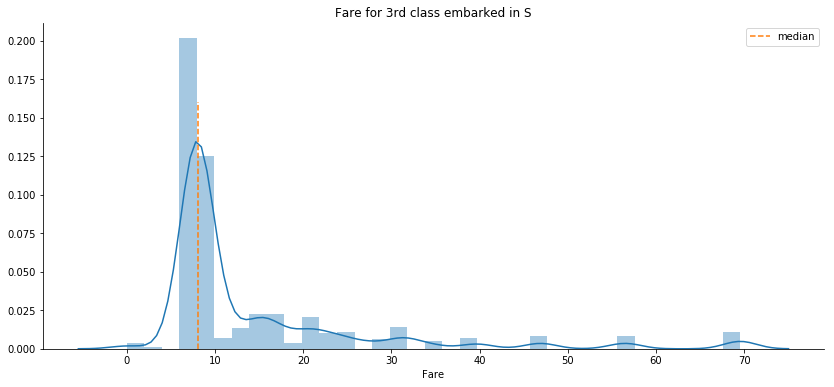

In [26]:
# Initialize the set 'Class3_EmbarkedS' which contains all 3rd class passengers who embarked from S
Class3_EmbarkedS = all_data['Fare'].loc[(all_data['Pclass']==3) & (all_data['Embarked']=='S')]

# Create plot of fare values for passengers in 3rd class that embarked from Southampton
# Setting parameters for plot
plt.figure(figsize=[14,6])
sns.distplot(Class3_EmbarkedS.dropna(), color='C0')
plt.plot([Class3_EmbarkedS.median(), Class3_EmbarkedS.median()], [0, 0.16], '--', color='C1')

sns.despine(bottom=0, left=0)
plt.title('Fare for 3rd class embarked in S')
plt.xlabel('Fare')
plt.legend(['median'])
plt.show()

In [27]:
# Replace missing fares for passengers in 3rd class that embarked from Southampton
# with median fare value for those passengers
all_data['Fare'] = all_data['Fare'].fillna(Class3_EmbarkedS.median())

# Display all passengers with missing fares
# There should be no missing fares now
display(all_data[all_data['Fare'].isnull()])

,index,Age,Cabin,DataSet,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


# Determine Missing Embarked Values

In [28]:
# Display all passengers with missing 'Embarked' information
display(all_data[all_data['Embarked'].isnull()])

,index,Age,Cabin,DataSet,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,61,38.0,B28,Training,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,829,62.0,B28,Training,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [22]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,0,0.0,1.0


In [29]:
# Initialize the set 'EmbarkedS' which contains all passengers who embarked from Southampton
EmbarkedS = all_data.loc[(all_data['Embarked']=='S')]

# Print the number of passengers who embarked from Southampton
print("Number of passengers who embarked from Southampton:", EmbarkedS['Embarked'].size)

# Print overview of passengers who embarked from Southampton
EmbarkedS.info()

Number of passengers who embarked from Southampton: 914
<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 1307
Data columns (total 14 columns):
index          914 non-null int64
Age            782 non-null float64
Cabin          170 non-null object
DataSet        914 non-null object
Embarked       914 non-null object
Fare           914 non-null float64
Name           914 non-null object
Parch          914 non-null int64
PassengerId    914 non-null int64
Pclass         914 non-null int64
Sex            914 non-null object
SibSp          914 non-null int64
Survived       644 non-null float64
Ticket         914 non-null object
dtypes: float64(3), int64(5), object(6)
memory usage: 107.1+ KB


In [30]:
# Initialize the set 'Class1_EmbarkedS' which contains the data for all 1st class passengers who embarked from Southampton
Class1_EmbarkedS = all_data.loc[(all_data['Embarked']=='S') & (all_data['Pclass']==1)]

# Print the number of 1st class passengers who embarked from S
print("Number of first class passengers who embarked from Southampton:", Class1_EmbarkedS['index'].size)

# Print the median of the 'Fare' data for all first class passengers who embarked from Southampton
print("Median fare of first class passengers who embarked from Southampton:", Class1_EmbarkedS['Fare'].median())

# Print the mean of the 'Fare' data for all first class passengers who embarked from Southampton
print("Average fare of first class passengers who embarked from Southampton:", Class1_EmbarkedS['Fare'].mean())

# Print overview of first class passengers who embarked from Southampton
Class1_EmbarkedS.info()

Number of first class passengers who embarked from Southampton: 177
Median fare of first class passengers who embarked from Southampton: 52.0
Average fare of first class passengers who embarked from Southampton: 72.14809435028249
<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 3 to 1294
Data columns (total 14 columns):
index          177 non-null int64
Age            151 non-null float64
Cabin          140 non-null object
DataSet        177 non-null object
Embarked       177 non-null object
Fare           177 non-null float64
Name           177 non-null object
Parch          177 non-null int64
PassengerId    177 non-null int64
Pclass         177 non-null int64
Sex            177 non-null object
SibSp          177 non-null int64
Survived       127 non-null float64
Ticket         177 non-null object
dtypes: float64(3), int64(5), object(6)
memory usage: 20.7+ KB


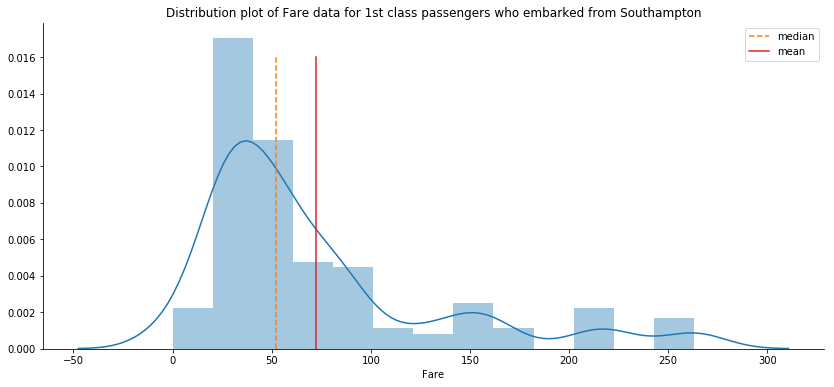

In [31]:
# Create plot of fare values for passengers in first class that embarked from Southampton
# Setting parameters for plot
plt.figure(figsize=[14,6])
sns.distplot(Class1_EmbarkedS['Fare'].dropna(), color='C0')
plt.plot([Class1_EmbarkedS['Fare'].median(), Class1_EmbarkedS['Fare'].median()], [0, 0.016], '--', color='C1')
plt.plot([Class1_EmbarkedS['Fare'].mean(), Class1_EmbarkedS['Fare'].mean()], [0, 0.016], '-', color='C3')

sns.despine(bottom=0, left=0)
plt.title('Distribution plot of Fare data for 1st class passengers who embarked from Southampton')
plt.xlabel('Fare')
plt.legend(['median', 'mean'])
plt.show()

In [32]:
# Initialize the set 'Class1_EmbarkedC' which contains the data for all 1st class passengers who embarked from Cherbourg
Class1_EmbarkedC = all_data.loc[(all_data['Embarked']=='C') & (all_data['Pclass']==1)]

# Print the number of 1st class passengers who embarked from Cherbourg
print("Number of first class passengers who embarked from Cherbourg:", Class1_EmbarkedC['index'].size)

# Print the median of the 'Fare' data for all first class passengers who embarked from Cherbourg
print("Median fare of first class passengers who embarked from Cherbourg:", Class1_EmbarkedC['Fare'].median())

# Print the median of the 'Fare' data for all first class passengers who embarked from Cherbourg
print("Average fare of first class passengers who embarked from Cherbourg:", Class1_EmbarkedC['Fare'].mean())

# Print overview of first class passengers who embarked from Cherbourg
Class1_EmbarkedC.info()

Number of first class passengers who embarked from Cherbourg: 141
Median fare of first class passengers who embarked from Cherbourg: 76.7292
Average fare of first class passengers who embarked from Cherbourg: 106.84533049645385
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 1305
Data columns (total 14 columns):
index          141 non-null int64
Age            128 non-null float64
Cabin          111 non-null object
DataSet        141 non-null object
Embarked       141 non-null object
Fare           141 non-null float64
Name           141 non-null object
Parch          141 non-null int64
PassengerId    141 non-null int64
Pclass         141 non-null int64
Sex            141 non-null object
SibSp          141 non-null int64
Survived       85 non-null float64
Ticket         141 non-null object
dtypes: float64(3), int64(5), object(6)
memory usage: 16.5+ KB


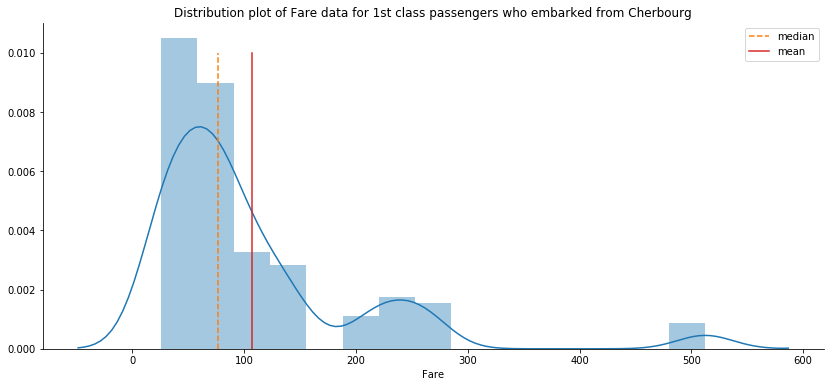

In [33]:
# Create plot of fare values for passengers in first class that embarked from Cherbourg
# Setting parameters for plot
plt.figure(figsize=[14,6])
sns.distplot(Class1_EmbarkedC['Fare'].dropna(), color='C0')
plt.plot([Class1_EmbarkedC['Fare'].median(), Class1_EmbarkedC['Fare'].median()], [0, 0.01], '--', color='C1')
plt.plot([Class1_EmbarkedC['Fare'].mean(), Class1_EmbarkedC['Fare'].mean()], [0, 0.01], '-', color='C3')

sns.despine(bottom=0, left=0)
plt.title('Distribution plot of Fare data for 1st class passengers who embarked from Cherbourg')
plt.xlabel('Fare')
plt.legend(['median', 'mean'])
plt.show()

In [34]:
# Initialize the set 'Class1_EmbarkedQ' which contains the data for all 1st class passengers who embarked from Queenstown
Class1_EmbarkedQ = all_data.loc[(all_data['Embarked']=='Q') & (all_data['Pclass']==1)]

# Print the number of 1st class passengers who embarked from Queenstown
print("Number of first class passengers who embarked from Queenstown:", Class1_EmbarkedQ['index'].size)

# Print the median of the 'Fare' data for all first class passengers who embarked from Queenstown
print("Median fare of first class passengers who embarked from Queenstown:", Class1_EmbarkedQ['Fare'].median())

# Print the median of the 'Fare' data for all first class passengers who embarked from Queenstown
print("Average fare of first class passengers who embarked from Queenstown:", Class1_EmbarkedQ['Fare'].mean())

# Print overview of first class passengers who embarked from Queenstown
Class1_EmbarkedQ.info()

Number of first class passengers who embarked from Queenstown: 3
Median fare of first class passengers who embarked from Queenstown: 90.0
Average fare of first class passengers who embarked from Queenstown: 90.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 245 to 1302
Data columns (total 14 columns):
index          3 non-null int64
Age            3 non-null float64
Cabin          3 non-null object
DataSet        3 non-null object
Embarked       3 non-null object
Fare           3 non-null float64
Name           3 non-null object
Parch          3 non-null int64
PassengerId    3 non-null int64
Pclass         3 non-null int64
Sex            3 non-null object
SibSp          3 non-null int64
Survived       2 non-null float64
Ticket         3 non-null object
dtypes: float64(3), int64(5), object(6)
memory usage: 360.0+ bytes


/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


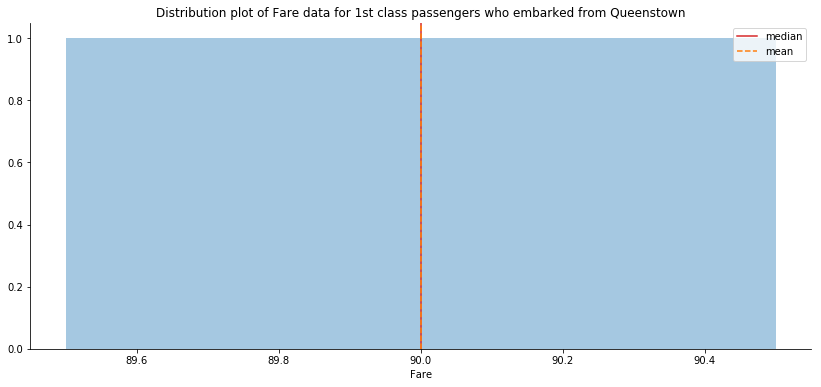

In [35]:
# Create plot of fare values for passengers in first class that embarked from Queenstown
# Setting parameters for plot
plt.figure(figsize=[14,6])
sns.distplot(Class1_EmbarkedQ['Fare'].dropna(), color='C0')
plt.plot([Class1_EmbarkedQ['Fare'].mean(), Class1_EmbarkedQ['Fare'].mean()], [0, 1.5], '-', color='C3')
plt.plot([Class1_EmbarkedQ['Fare'].median(), Class1_EmbarkedQ['Fare'].median()], [0, 1.5], '--', color='C1')

sns.despine(bottom=0, left=0)
plt.title('Distribution plot of Fare data for 1st class passengers who embarked from Queenstown')
plt.xlabel('Fare')
plt.legend(['median', 'mean'])
plt.show()

In [36]:
# Update Embarked Information
all_data.set_value(61, 'Embarked', 'S')

# Check that embarked location was successfully updated to Southampton
display(all_data.loc[61])

all_data.set_value(829, 'Embarked', 'S')

# Check that embarked location was successfully updated to Southampton
display(all_data.loc[829])

# Confirm that all embark location data is now nonempty
all_data.info()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


index                           61
Age                             38
Cabin                          B28
DataSet                   Training
Embarked                         S
Fare                            80
Name           Icard, Miss. Amelie
Parch                            0
PassengerId                     62
Pclass                           1
Sex                         female
SibSp                            0
Survived                         1
Ticket                      113572
Name: 61, dtype: object

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


index                                                829
Age                                                   62
Cabin                                                B28
DataSet                                         Training
Embarked                                               S
Fare                                                  80
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Parch                                                  0
PassengerId                                          830
Pclass                                                 1
Sex                                               female
SibSp                                                  0
Survived                                               1
Ticket                                            113572
Name: 829, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
index          1309 non-null int64
Age            1046 non-null float64
Cabin          295 non-null object
DataSet        1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(6)
memory usage: 143.2+ KB


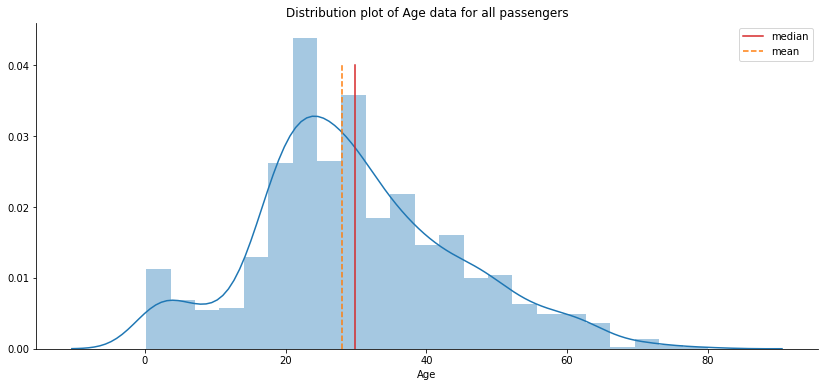

In [37]:
# Create plot of ages for all passengers
# Setting parameters for plot
plt.figure(figsize=[14,6])
sns.distplot(all_data['Age'].dropna(), color='C0')
plt.plot([all_data['Age'].mean(), all_data['Age'].mean()], [0, 0.04], '-', color='C3')
plt.plot([all_data['Age'].median(), all_data['Age'].median()], [0, 0.04], '--', color='C1')

sns.despine(bottom=0, left=0)
plt.title('Distribution plot of Age data for all passengers')
plt.xlabel('Age')
plt.legend(['median', 'mean'])
plt.show()

In [38]:
# Initialize the set 'Class1_EmbarkedQ' which contains the data for all 1st class passengers who embarked from Queenstown
Age_LessThan_18 = all_data.loc[(all_data['Age']<18)]

Age_LessThan_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 7 to 1300
Data columns (total 14 columns):
index          154 non-null int64
Age            154 non-null float64
Cabin          23 non-null object
DataSet        154 non-null object
Embarked       154 non-null object
Fare           154 non-null float64
Name           154 non-null object
Parch          154 non-null int64
PassengerId    154 non-null int64
Pclass         154 non-null int64
Sex            154 non-null object
SibSp          154 non-null int64
Survived       113 non-null float64
Ticket         154 non-null object
dtypes: float64(3), int64(5), object(6)
memory usage: 18.0+ KB


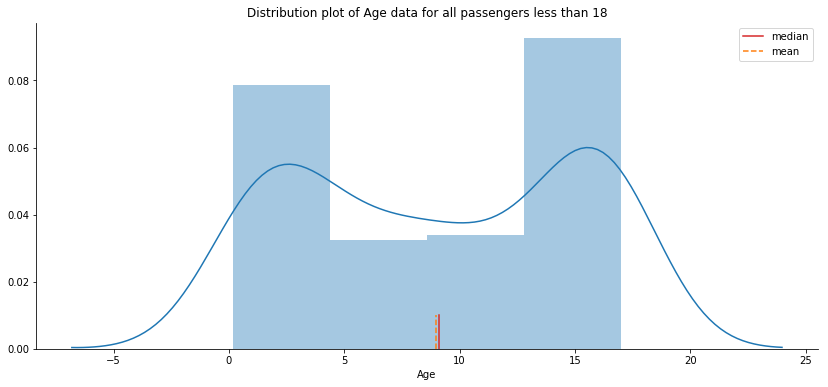

In [39]:
# Create plot of fare values for passengers in first class that embarked from Queenstown
# Setting parameters for plot
plt.figure(figsize=[14,6])
sns.distplot(Age_LessThan_18['Age'].dropna(), color='C0')
plt.plot([Age_LessThan_18['Age'].mean(), Age_LessThan_18['Age'].mean()], [0, 0.01], '-', color='C3')
plt.plot([Age_LessThan_18['Age'].median(), Age_LessThan_18['Age'].median()], [0, 0.01], '--', color='C1')

sns.despine(bottom=0, left=0)
plt.title('Distribution plot of Age data for all passengers less than 18')
plt.xlabel('Age')
plt.legend(['median', 'mean'])
plt.show()

In [40]:
# Clean up and feature engineering

# Label Survived for plot
all_data['Survived'] = all_data['Survived'].replace([0, 1], ['no', 'yes'])

# Label Sex for plot
all_data['Sex'] = all_data['Sex'].replace([0, 1], ['male', 'female'])

# Transform Fare to today's US dollar, for fun
all_data['Fare'] = all_data['Fare']*108*1.3 #historic gbp to current gbp to current usd

# Get personal title from Name, merge rare titles
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
toreplace = ['Jonkheer.', 'Ms.', 'Mlle.', 'Mme.', 'Capt.', 'Don.', 'Major.',
             'Col.', 'Sir.', 'Dona.', 'Lady.', 'the']
replacewith = ['Master.', 'Miss.', 'Miss.', 'Mrs.', 'Sir.', 'Sir.', 'Sir.',
              'Sir.', 'Sir.', 'Lady.', 'Lady.', 'Lady.']
all_data['Title'] = all_data['Title'].replace(toreplace, replacewith)

# Get family names
all_data['FamName'] = all_data['Name'].apply(lambda x: x.split(',')[0])

# Get family sizes based on Parch and SibSp, classify as single/small/large
all_data['FamSize'] = all_data['Parch'] + all_data['SibSp'] + 1
all_data['FamSize2'] = pd.cut(all_data['FamSize'], [0, 1, 4, 11], labels=['single', 'small', 'large'])

# Get group sizes based on Ticket, classify as single/small/large
all_data['GrpSize'] = all_data['Ticket'].replace(all_data['Ticket'].value_counts())
all_data['GrpSize2'] = pd.cut(all_data['GrpSize'], [0, 1, 4, 11], labels=['single', 'small', 'large'])

# Get Deck from Cabin letter
def getdeck(cabin):
    if not pd.isnull(cabin) and cabin[0] in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        return cabin[0]
    else:
        return 'X'

all_data['Deck'] = all_data['Cabin'].apply(getdeck)

# Get a rough front/mid/back location on the ship based on Cabin number
'''
A front
B until B49 is front, rest mid
C until C46 is front, rest mid
D until D50 is front, rest back
E until E27 is front, until E76 mid, rest back
F back
G back
Source: encyclopedia-titanica.org/titanic-deckplans/
'''
def getfmb(cabin):

    if not pd.isnull(cabin) and len(cabin)>1:
        if (cabin[0]=='A'
            or cabin[0]=='B' and int(cabin[1:4])<=49
            or cabin[0]=='C' and int(cabin[1:4])<=46
            or cabin[0]=='D' and int(cabin[1:4])<=50
            or cabin[0]=='E' and int(cabin[1:4])<=27):
            return 'front'

        elif (cabin[0]=='B' and int(cabin[1:4])>49
            or cabin[0]=='C' and int(cabin[1:4])>46
            or cabin[0]=='E' and int(cabin[1:4])>27 and int(cabin[1:4])<=76):
            return 'mid'

        elif (cabin[0]=='F'
           or cabin[0]=='G'
           or cabin[0]=='D' and int(cabin[1:4])>50):
            return 'back'

        else:
            return 'unknown'
    else:
        return 'unknown'

all_data['CabinLoc'] = all_data['Cabin'].apply(getfmb)

datastrings = all_data.copy() # save data containing string features to use for plotting later

In [ ]:
# Factorize the string features

all_data['CabinLoc'] = all_data['CabinLoc'].replace(['unknown', 'front', 'mid', 'back'], range(4))

all_data['Deck'] = all_data['Deck'].replace(['X', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], range(8))

all_data['GrpSize2'] = all_data['GrpSize2'].astype(str) #convert from category dtype
all_data['GrpSize2'] = all_data['GrpSize2'].replace(['single', 'small', 'large'], range(3))

all_data['FamSize2'] = all_data['FamSize2'].astype(str) #convert from category dtype
all_data['FamSize2'] = all_data['FamSize2'].replace(['single', 'small', 'large'], range(3))

all_data['Title'] = all_data['Title'].replace(all_data['Title'].unique(), range(8))

all_data['Embarked'] = all_data['Embarked'].replace(['S', 'C', 'Q'], range(3))

all_data['Sex'] = all_data['Sex'].replace(['male', 'female'], range(2)) 

all_data['Survived'] = all_data['Survived'].replace(['no', 'yes'], range(2)) 

all_data_copy = all_data.copy() # save df containing factorized features to use for subsequent analysis

# Determining Missing Age Values

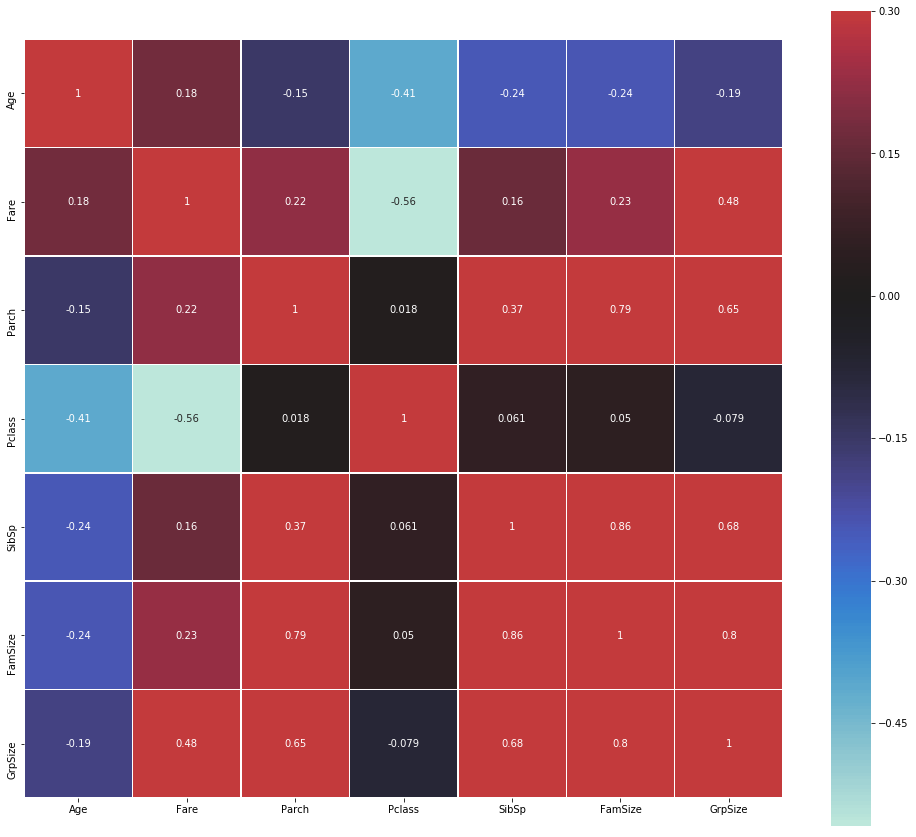

In [41]:
# Plot updated correlation matrix
corrMat = all_data[['Age','Cabin','Embarked','Fare','Parch','Pclass','Sex','SibSp','Ticket']].corr()
corrMat = all_data.drop(['index', 'PassengerId'], axis = 1).corr()

# Initialize matplotlib figure
f, ax = plt.subplots(figsize=(17,15))

# Set custom colormap options
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation matrix as a heatmap with mask
sns.heatmap(corrMat, vmax=.3, annot=True,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [42]:
# Still need to perform linear regression to predict missing age values (maybe... current classification is looking decent)
# ----- Configure data for survival classification using neural network -----
age_class_data = all_data[['Age','Embarked','Fare','Parch','Pclass','Sex','SibSp','Survived']].loc[all_data['DataSet']=='Training']

# Split data into training and testing sets
age_data_training = age_class_data[age_class_data['Age'].notnull()]
age_data_testing = age_class_data[age_class_data['Age'].isnull()]

# View info on training and testing sets
print("------ Training Data Information ------")
age_data_training.info()

print("\n\n------ Testing Data Information ------")
age_data_testing.info()

# ----- Format input and target data for age classification as numpy matrices -----
# Create numpy matricies for training data
X_train_age = age_data_training.iloc[:, 1:7].values
#age_data_training.iloc[:, 1:7].info()  # Code for viewing info about data used in matrix
Y_train_age = age_data_training[['Survived']].values
#age_data_training[['Age']].info()  # Code for viewing info about data used in matrix
# Confirming that the shape of the training matrices are correct
print("\n\nShape of X_train: ", X_train_age.shape)
print("Shape of Y_train: ", Y_train_age.shape)


# Create numpy matricies for testing data
X_test_age = age_data_testing.iloc[:, 1:7].values
#age_data_training.iloc[:, 1:7].info()  # Code for viewing info about data used in matrix
Y_test_age = age_data_testing[['Age']].values

------ Training Data Information ------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
Age         714 non-null float64
Embarked    714 non-null object
Fare        714 non-null float64
Parch       714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
SibSp       714 non-null int64
Survived    714 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 50.2+ KB


------ Testing Data Information ------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 8 columns):
Age         0 non-null float64
Embarked    177 non-null object
Fare        177 non-null float64
Parch       177 non-null int64
Pclass      177 non-null int64
Sex         177 non-null object
SibSp       177 non-null int64
Survived    177 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 12.4+ KB


Shape of X_train:  (714, 6)
Shape of Y_train:  (714, 1)


In [55]:
#import utils
from sklearn import preprocessing

#clean_data(train)
#utils.clean_data(train)
target = train_data_drop["Survived"].values
features = train_data_drop[["Pclass","Age","Sex","SibSp","Parch"]].values

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features,target)

#print(classifier.fit(features,target))
print(classifier_.score(features,target))

poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit(features)

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(poly_features,target)



ValueError: could not convert string to float: 'male'

In [43]:
#Decision Tree
from sklearn import tree, model_selection
decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree_ = decision_tree.fit(features, target)
print(decision_tree_.score(feature,target))
scores = model_selection.cross_val_score(decision_tree,features,target,scoring='accuracy',cv=50)
print(scores)
print(scores.mean())

ValueError: could not convert string to float: 'male'

In [ ]:
genarized_tree = tree.DecisionTreeClassifier(random_state = 1
                                            ,max_depth = 7
                                            ,min_sample_split=2)
genarized_tree_ = genarized_tree.fit(features, target)
print(genarized_tree_.score(feature,target))
scores = model_selection.cross_val_score(genarized_tree,features,target,scoring='accuracy',cv=50)


In [ ]:
#visualize tree
#tree.export_graphviz(genaralized_tree_,features_names=features,out_file="tree.out")
